## Lego DataSet Exploratory Data Analysis
### DataSci200 Project 2
#### https://www.kaggle.com/datasets/rtatman/lego-database?resource=download

![alt text](downloads_schema.png "Lego Scema")

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)

In [134]:
# Import Individual Lego DataFrames
colors = pd.read_csv("data/colors.csv")
parts = pd.read_csv("data/parts.csv")
sets = pd.read_csv("data/sets.csv")
themes = pd.read_csv("data/themes.csv")
inventories = pd.read_csv("data/inventories.csv")
inventory_parts = pd.read_csv("data/inventory_parts.csv")
inventory_sets = pd.read_csv("data/inventory_sets.csv")
part_categories = pd.read_csv("data/part_categories.csv")
#Import IMDB data
imdb_titles = pd.read_csv("data/title.basics.tsv.gz", sep= "\t")

C:\Users\mhurth\AppData\Local\Temp\1\ipykernel_24916\1532061355.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_titles = pd.read_csv("data/title.basics.tsv.gz", sep= "\t")


In [14]:
# Merging Sets and Themes to look at most common themes over time
sets_and_themes_df = sets.merge(themes, left_on="theme_id", right_on="id", how='left', suffixes=('_set', "_theme"))
sets_and_themes_df.head(1000)

,set_num,name_set,year,theme_id,num_parts,id,name_theme,parent_id
0,00-1,Weetabix Castle,1970,414,471,414,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,84,Supplemental,67.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,199,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
5,0014-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
6,0015-1,Space Mini-Figures,1979,143,18,143,Supplemental,126.0
7,0016-1,Castle Mini Figures,1978,186,15,186,Castle,NaN
8,00-2,Weetabix Promotional House 1,1976,413,147,413,Building,411.0
9,00-3,Weetabix Promotional House 2,1976,413,149,413,Building,411.0


In [15]:
theme_count = pd.DataFrame(sets_and_themes_df.name_theme.value_counts())
theme_count.columns = ["Count"]
theme_count.head(1000)

,Count
Supplemental,496
Technic,435
City,287
Friends,269
Basic Set,257
Creator,249
Gear,246
Service Packs,242
Duplo,219
Star Wars,211


In [16]:
theme_count.sort_index().head(1000)

,Count
12V,50
4 Juniors,2
4.5V,88
9V,53
Advent,3
Advent Sub-Set,96
Adventurers,2
Agents,13
Agori,6
Airjitzu,7


##### Some observations of the theme Data
Many themes could be grouped into superthemes like: 
- Aquaraiders
- Blacktron
- Space 
- Dinosaurs
- Disney
- Knights
- Jurrassic Park
- Matoran, Ninja
- Pirates, Planet
- Indiana Jones (Raiders of lost Ark, Temple of Doom,)
- Minifigures
- Spider-Man
- Star Wars
- The Lord of the Rings (The Fellowship of the Ring, The Hobbit, The Lord of the Rings, The Return of the King, The Two Towers)
- Toa
- Western

These grouping may be key to elucidating some of the trends with time and films so we will use the parent them going forward. We will need to impute the parent theme accordingly

In [24]:
# Parent_id is empty for the parents
sets_and_themes_df.isna().sum()

set_num         0
name_set        0
year            0
theme_id        0
num_parts       0
id              0
name_theme      0
parent_id       0
parent_theme    0
dtype: int64

In [20]:
sets_and_themes_df.parent_id = sets_and_themes_df.parent_id.fillna(sets_and_themes_df.id)
sets_and_themes_df.isna().sum()

set_num       0
name_set      0
year          0
theme_id      0
num_parts     0
id            0
name_theme    0
parent_id     0
dtype: int64

In [21]:
id_themes = sets_and_themes_df[["id","name_theme"]].drop_duplicates()
id_themes

,id,name_theme
0,414,Castle
1,84,Supplemental
2,199,Lion Knights
3,143,Supplemental
7,186,Castle
8,413,Building
11,366,Basic Set
12,67,Classic Town
18,502,Game
24,469,Basic Set


In [22]:
sets_and_themes_df = sets_and_themes_df.merge(id_themes, left_on="parent_id", right_on="id", suffixes=("","_parent"))
sets_and_themes_df.drop(columns=["id_parent"],inplace=True)
sets_and_themes_df.rename(columns={"name_theme_parent":"parent_theme"}, inplace=True)
sets_and_themes_df.head(1000)

,set_num,name_set,year,theme_id,num_parts,id,name_theme,parent_id,parent_theme
0,00-1,Weetabix Castle,1970,414,471,414,Castle,411.0,Legoland
1,00-2,Weetabix Promotional House 1,1976,413,147,413,Building,411.0,Legoland
2,00-3,Weetabix Promotional House 2,1976,413,149,413,Building,411.0,Legoland
3,00-4,Weetabix Promotional Windmill,1976,413,126,413,Building,411.0,Legoland
4,00-7,Weetabix Promotional Lego Village,1976,413,3,413,Building,411.0,Legoland
5,102A-1,Front-End Loader,1970,416,64,416,Construction,411.0,Legoland
6,102A-2,Front-End Loader,1970,416,56,416,Construction,411.0,Legoland
7,1-10,Mini-Wheel Model Maker No. 1,1971,423,86,423,Vehicle,411.0,Legoland
8,1550-1,Sterling Super Caravelle,1972,412,49,412,Airport,411.0,Legoland
9,1551-2,Sterling Luggage Carrier,1972,412,49,412,Airport,411.0,Legoland


In [29]:
theme_count = pd.DataFrame(sets_and_themes_df.parent_theme.value_counts())
theme_count.columns = ["Count"]
theme_count.head(1000)

,Count
Advent Sub-Set,625
Service Packs,549
Star Wars,538
Collectible Minifigures,441
Gear,433
Classic Town,429
Bionicle,417
City,354
Technic,350
Creator,335


The below plot shows the most common themes by number of sets included within the theme

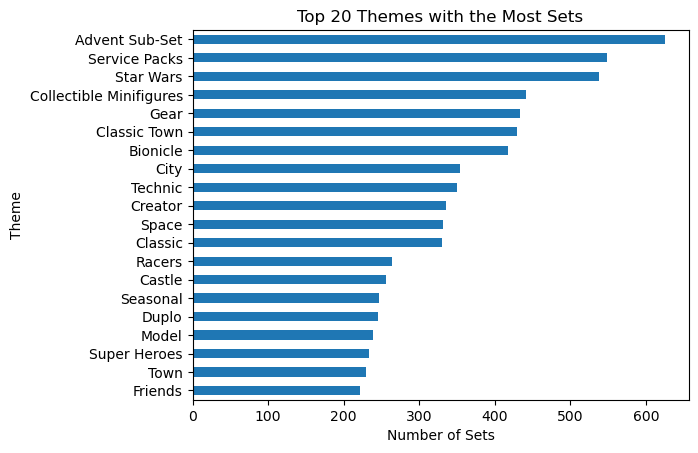

In [51]:
theme_count[:20].plot.barh(legend=False)
plt.ylabel("Theme")
plt.xlabel("Number of Sets")
plt.title("Top 20 Themes with the Most Sets")
plt.gca().invert_yaxis()
plt.show()

In [62]:
# Most Popular Theme By Year
counts_by_year_by_theme = sets_and_themes_df[["year", "parent_theme","set_num"]].groupby(["year", "parent_theme"]).count().sort_values(by="year").reset_index()
counts_by_year_by_theme["max_sets"] = counts_by_year_by_theme[["year", "set_num"]].groupby("year").transform(max)
max_counts_by_year_by_theme = counts_by_year_by_theme[counts_by_year_by_theme.set_num == counts_by_year_by_theme.max_sets]
max_counts_by_year_by_theme

,year,parent_theme,set_num,max_sets
0,1950,Classic,7,7
1,1953,Classic,4,4
2,1954,Classic,14,14
4,1955,Classic,27,27
6,1956,Classic,11,11
7,1957,Classic,21,21
8,1958,Classic,42,42
9,1959,Classic,4,4
10,1960,Books,1,1
11,1960,Classic,1,1


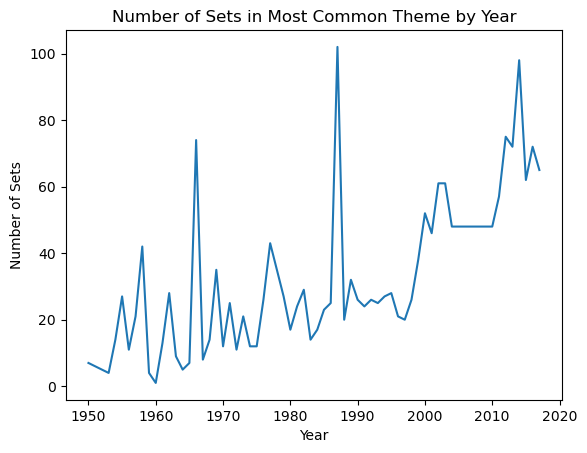

In [89]:
sns.lineplot(data=max_counts_by_year_by_theme, x="year", y="max_sets")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Number of Sets in Most Common Theme by Year")
plt.show()

C:\Users\mhurth\AppData\Local\Temp\1\ipykernel_24916\683201041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_counts_by_year_by_theme.rename(columns={"parent_theme":"Theme"}, inplace=True)


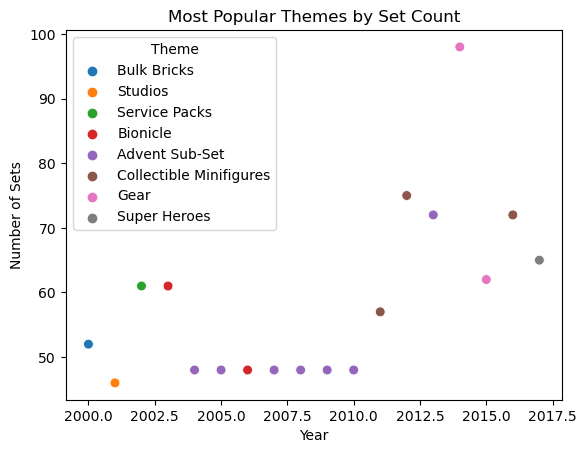

In [87]:
max_counts_by_year_by_theme.rename(columns={"parent_theme":"Theme"}, inplace=True)
max_counts_by_year_by_theme_since_2000 = max_counts_by_year_by_theme[max_counts_by_year_by_theme.year >= 2000]
sns.scatterplot(data=max_counts_by_year_by_theme_since_2000, x="year", y="max_sets", hue="Theme", s=50)
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Most Popular Themes by Set Count")
plt.show()

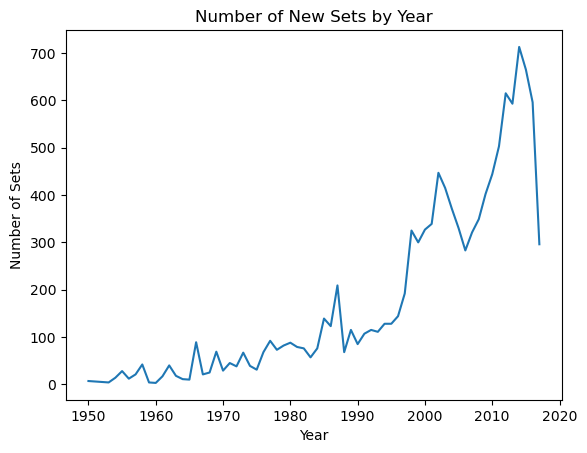

In [94]:
new_sets_by_year = sets[["year","set_num"]].groupby(["year"]).count()
new_sets_by_year.plot(legend=False)
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Number of New Sets by Year")
plt.show()

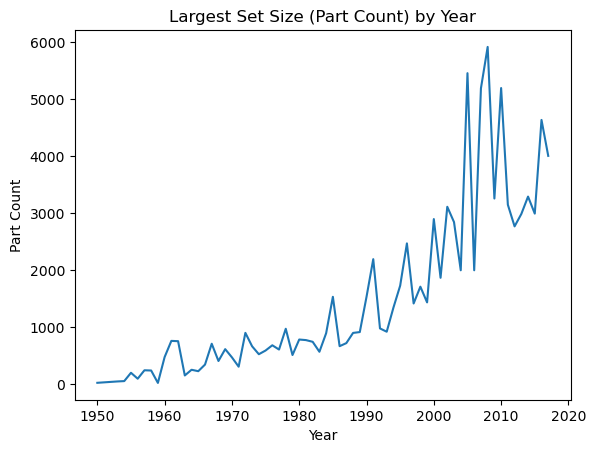

In [100]:
max_part_number_by_year = sets.groupby("year")["num_parts"].max()
max_part_number_by_year.plot()
plt.xlabel("Year")
plt.ylabel("Part Count")
plt.title("Largest Set Size (Part Count) by Year")
plt.show()

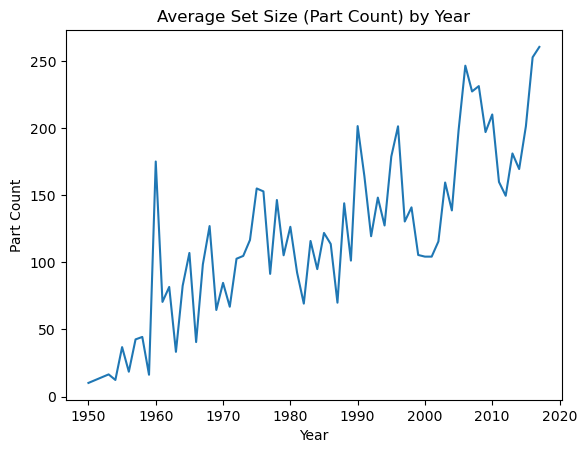

In [101]:
avg_part_number_by_year = sets.groupby("year")["num_parts"].mean()
avg_part_number_by_year.plot()
plt.xlabel("Year")
plt.ylabel("Part Count")
plt.title("Average Set Size (Part Count) by Year")
plt.show()

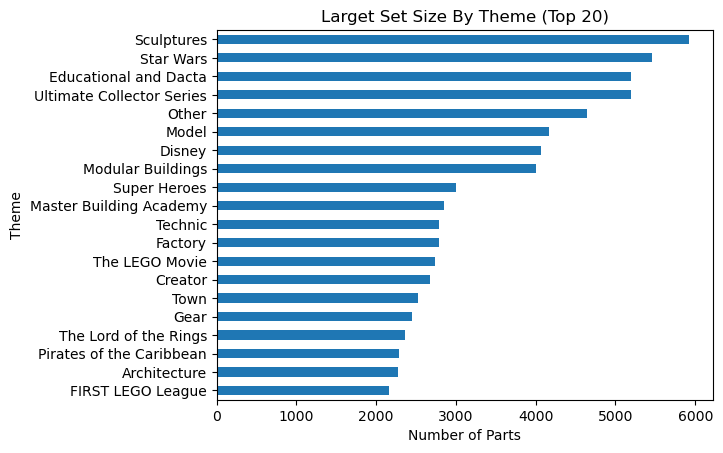

In [107]:
max_parts_by_theme = sets_and_themes_df.groupby("parent_theme")["num_parts"].max().sort_values(ascending=False)
max_parts_by_theme[0:20].plot.barh()
plt.ylabel("Theme")
plt.xlabel("Number of Parts")
plt.title("Largest Set Size By Theme (Top 20)")
plt.gca().invert_yaxis()
plt.show()

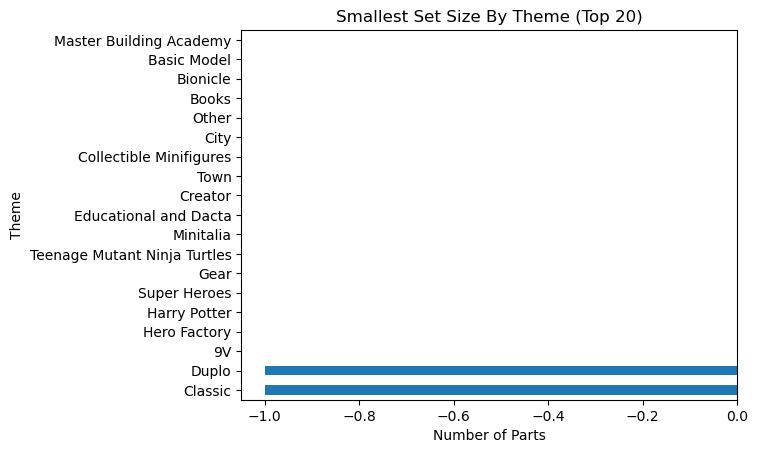

In [112]:
min_parts_by_theme = sets_and_themes_df.groupby("parent_theme")["num_parts"].min().sort_values(ascending=False)
min_parts_by_theme[-20:-1].plot.barh()
plt.ylabel("Theme")
plt.xlabel("Number of Parts")
plt.title("Smallest Set Size By Theme (Top 20)")
plt.gca().invert_yaxis()
plt.show()

<AxesSubplot:>

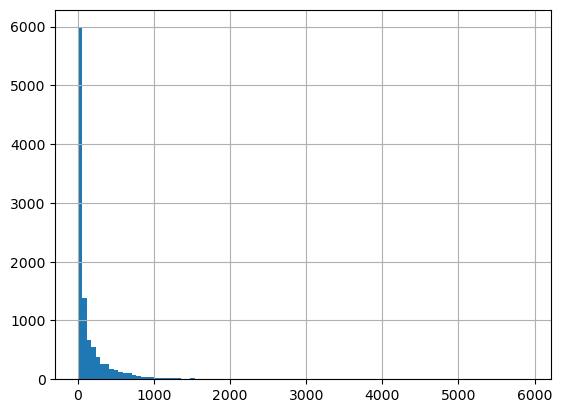

In [114]:
sets_and_themes_df["num_parts"].hist(bins=100)

In [111]:
theme_count.sort_index()

,Count
4 Juniors,17
9V,59
Advent,33
Advent Sub-Set,625
Agents,28
Alpha Team,31
Angry Birds,6
Architecture,65
Atlantis,24
Avatar,2


#### Movie Related Themes
- Star Wars
- Harry Potter
- The Hobbit/The Lord of the Rings
- Pirates Of The Caribean
- Teenage Mutant Ninja Turtles
- Indiana Jones
- Jurrasic World
- The Lone Ranger
- The Lego Movie
- Avatar
- Batman
- Prince of Persia

In [116]:
imdb_titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


For IMDB data I am only interested in movies overlapping with the lego data sets and Movies or TV
- Filter out by year
- filter out by titleType

A big assumption here is that I am only looking at box office feature films and not short, videos, tv, and streaming content associated with these franchises

In [125]:
imdb_titles[imdb_titles["startYear"]=="\\N"]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
20798,tt0021123,movie,The March of Time,The March of Time,0,\N,\N,\N,Musical
65758,tt0067098,tvEpisode,Willi Forst,Willi Forst,0,\N,\N,55,\N
78451,tt0080155,movie,The Wonderful Years,Die wunderbaren Jahre,0,\N,\N,104,Drama
83807,tt0085677,tvEpisode,High Country,High Country,0,\N,\N,\N,Sport
90932,tt0092975,tvEpisode,Erste Liebe und Heiratssachen,Erste Liebe und Heiratssachen,0,\N,\N,\N,Documentary
...,...,...,...,...,...,...,...,...,...
9717374,tt9916616,short,Terror,Terror,0,\N,\N,13,"Drama,Short"
9717376,tt9916620,movie,The Copeland Case,The Copeland Case,0,\N,\N,\N,Drama
9717390,tt9916652,short,Untitled well- being Documentary,Untitled well- being Documentary,0,\N,\N,\N,Short
9717396,tt9916664,short,Untitled Land Army Girls Documentary,Untitled Land Army Girls Documentary,0,\N,\N,\N,Short


In [130]:
imdb_titles["titleType"].unique()

array(['movie', 'short', 'tvSeries', 'tvMovie', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [136]:
imdb_titles.loc[imdb_titles["startYear"]=="\\N", "startYear"] = np.nan

In [171]:
print(f"IMDB is of shape {imdb_titles.shape}")
imdb_titles.dropna(subset=["startYear"], inplace=True)
imdb_titles["startYear"] = imdb_titles["startYear"].astype(int)
imdb_titles = imdb_titles[(imdb_titles["startYear"] >= 1950) & (imdb_titles["startYear"] <= 2017)]
print(f"IMDB is of shape {imdb_titles.shape} after date filter")
imdb_titles = imdb_titles.loc[imdb_titles["titleType"] == "movie"]
print(f"IMDB is of shape {imdb_titles.shape} after movie filter")

IMDB is of shape (401525, 9)
IMDB is of shape (382773, 9) after date filter
IMDB is of shape (382773, 9) after movie filter


In [172]:
star_wars_imdb = imdb_titles[imdb_titles["primaryTitle"].str.contains(r'\bstar wars\b', regex=True, case=False)]
star_wars_movies = ["Star Wars: Episode IV - A New Hope", 
                    "Star Wars: Episode V - The Empire Strikes Back", 
                    "Star Wars: Episode VI - Return of the Jedi", 
                    "Star Wars: Episode I - The Phantom Menace",
                    "Star Wars: Episode II - Attack of the Clones",
                    "Star Wars: Episode III - Revenge of the Sith",
                    "Star Wars: Episode VII - The Force Awakens",
                    "Star Wars: Episode VIII - The Last Jedi",
                    "Rogue One: A Star Wars Story",
                    "Solo: A Star Wars Story"]
star_wars_imdb = star_wars_imdb[star_wars_imdb["primaryTitle"].isin(star_wars_movies)].sort_values(by="startYear")
star_wars_imdb

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
75151,tt0076759,movie,Star Wars: Episode IV - A New Hope,Star Wars,0,1977,\N,121,"Action,Adventure,Fantasy"
78967,tt0080684,movie,Star Wars: Episode V - The Empire Strikes Back,The Empire Strikes Back,0,1980,\N,124,"Action,Adventure,Fantasy"
84311,tt0086190,movie,Star Wars: Episode VI - Return of the Jedi,Star Wars: Episode VI - Return of the Jedi,0,1983,\N,131,"Action,Adventure,Fantasy"
117975,tt0120915,movie,Star Wars: Episode I - The Phantom Menace,Star Wars: Episode I - The Phantom Menace,0,1999,\N,136,"Action,Adventure,Fantasy"
118697,tt0121765,movie,Star Wars: Episode II - Attack of the Clones,Star Wars: Episode II - Attack of the Clones,0,2002,\N,142,"Action,Adventure,Fantasy"
118698,tt0121766,movie,Star Wars: Episode III - Revenge of the Sith,Star Wars: Episode III - Revenge of the Sith,0,2005,\N,140,"Action,Adventure,Fantasy"
6143027,tt2488496,movie,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,0,2015,\N,138,"Action,Adventure,Sci-Fi"
6934659,tt3748528,movie,Rogue One: A Star Wars Story,Rogue One,0,2016,\N,133,"Action,Adventure,Sci-Fi"
6174371,tt2527336,movie,Star Wars: Episode VIII - The Last Jedi,Star Wars: Episode VIII - The Last Jedi,0,2017,\N,152,"Action,Adventure,Fantasy"


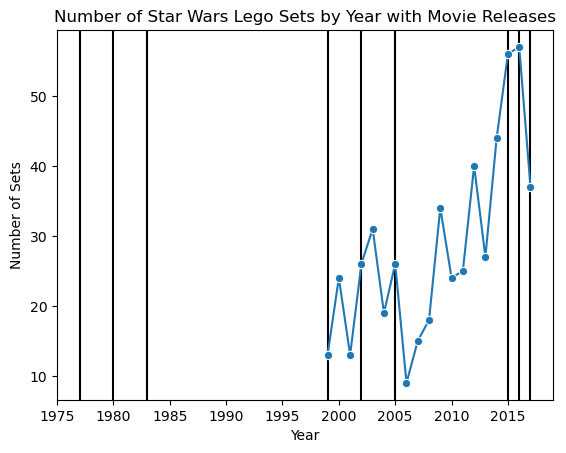

In [189]:
star_wars_lego = sets_and_themes_df.loc[sets_and_themes_df["parent_theme"].str.contains(r'\bstar wars\b', regex=True, case=False)]
star_wars_lego_sets_by_year = pd.DataFrame(star_wars_lego.groupby("year")["set_num"].count()).reset_index()
for year in star_wars_imdb["startYear"].unique():
    plt.axvline(x=year, color="black")
sns.lineplot(data=star_wars_lego_sets_by_year, x="year", y="set_num", marker="o")
plt.ylabel("Number of Sets")
plt.xlabel("Year")
plt.title("Number of Star Wars Lego Sets by Year with Movie Releases")
plt.show()

In [176]:
harry_potter_imdb = imdb_titles[imdb_titles["primaryTitle"].str.contains(r'\bharry potter\b', regex=True, case=False)]
harry_potter_movies = ["Harry Potter and the Sorcerer's Stone",
                       "Harry Potter and the Chamber of Secrets",
                       "Harry Potter and the Prisoner of Azkaban",
                       "Harry Potter and the Goblet of Fire",
                       "Harry Potter and the Order of the Phoenix",
                       "Harry Potter and the Half-Blood Prince",
                       "Harry Potter and the Deathly Hallows: Part 1",
                       "Harry Potter and the Deathly Hallows: Part 2"]
harry_potter_imdb = harry_potter_imdb[harry_potter_imdb["primaryTitle"].isin(harry_potter_movies)].sort_values(by="startYear")
harry_potter_imdb

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
231375,tt0241527,movie,Harry Potter and the Sorcerer's Stone,Harry Potter and the Sorcerer's Stone,0,2001,\N,152,"Adventure,Family,Fantasy"
282696,tt0295297,movie,Harry Potter and the Chamber of Secrets,Harry Potter and the Chamber of Secrets,0,2002,\N,161,"Adventure,Family,Fantasy"
291067,tt0304141,movie,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban,0,2004,\N,142,"Adventure,Family,Fantasy"
316355,tt0330373,movie,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire,0,2005,\N,157,"Adventure,Family,Fantasy"
358294,tt0373889,movie,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix,0,2007,\N,138,"Action,Adventure,Family"
400615,tt0417741,movie,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince,0,2009,\N,153,"Action,Adventure,Family"
896581,tt0926084,movie,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,0,2010,\N,146,"Adventure,Family,Fantasy"
2088705,tt1201607,movie,Harry Potter and the Deathly Hallows: Part 2,Harry Potter and the Deathly Hallows: Part 2,0,2011,\N,130,"Adventure,Family,Fantasy"


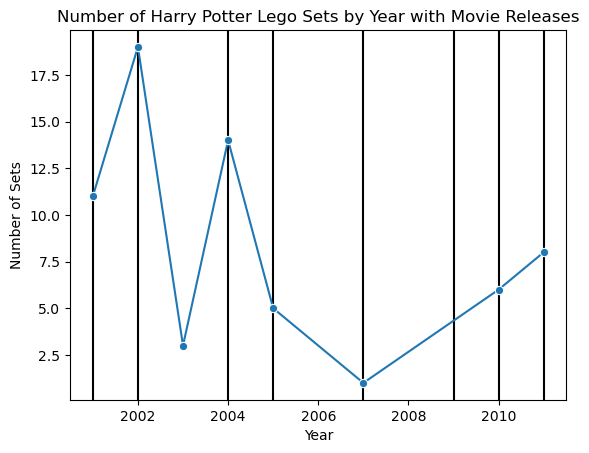

In [193]:
harry_potter_lego = sets_and_themes_df.loc[sets_and_themes_df["parent_theme"].str.contains(r'\bharry potter\b', regex=True, case=False)]
harry_potter_lego_sets_by_year = pd.DataFrame(harry_potter_lego.groupby("year")["set_num"].count()).reset_index()
for year in harry_potter_imdb["startYear"].unique():
    plt.axvline(x=year, color="black")
# df_dec18 = df_dec18.set_index('Day')
# df_new_dec18 = pd.DataFrame({"Day":range(1,32), "Reviews_published": 0}).set_index("Day")
# df_new_dec18["Reviews_published"]=df_dec18["Reviews_published"]
# df_new_dec18.fillna(0, inplace=True)
sns.lineplot(data=harry_potter_lego_sets_by_year, x="year", y="set_num", marker="o")
plt.ylabel("Number of Sets")
plt.xlabel("Year")
plt.title("Number of Harry Potter Lego Sets by Year with Movie Releases")
plt.show()

In [178]:
harry_potter_lego_sets_by_year

,year,set_num
0,2001,11
1,2002,19
2,2003,3
3,2004,14
4,2005,5
5,2007,1
6,2010,6
7,2011,8
